# Data Selection
**Probability Sampling:** Simple random Sampling, Stratified Sampling, Custer Sampling, Systematic Sampling
**Non-Probability Sampling;** Convenience Sampling, Purposive Sampling, Snowball Sampling, Quota Sampling

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#### Data Loading and Overview:
Load the Iris dataset and see the first overview.

In [9]:
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

print("Dimensi data (Baris, Kolom):", df.shape)  # Display the shape of the DataFrame (rows, columns)
print("\nInformasi tipe data dan encoding:")
print(df.info())  # Display data types and encoding scheme

print("\n5 Baris pertama dari DataFrame:")
df  # Display the first few rows of the DataFrame

Dimensi data (Baris, Kolom): (150, 5)

Informasi tipe data dan encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None

5 Baris pertama dari DataFrame:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


##### Validation of Data Quality:
Ensure there are consistency, missing values and data duplication.


Jumlah nilai yang hilang untuk setiap kolom:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
Terdapat 1, baris duplikat. Menghapus duplikat...

Jumlah nilai unik untuk setiap kolom:
sepal length (cm): 35
sepal width (cm): 23
petal length (cm): 43
petal width (cm): 22
target: 3
[0 1 2]


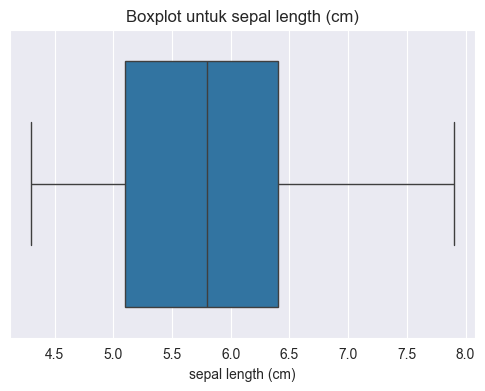

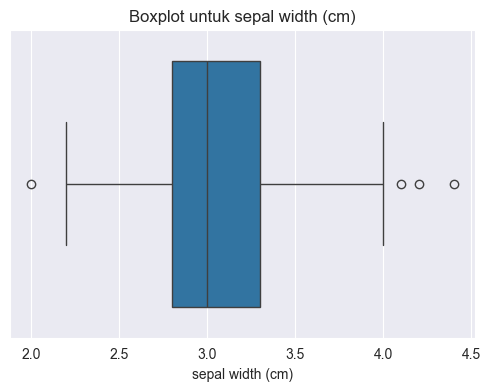

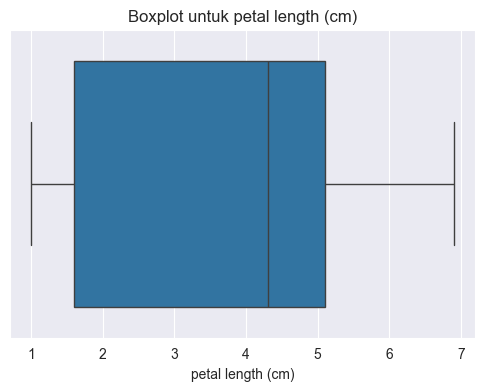

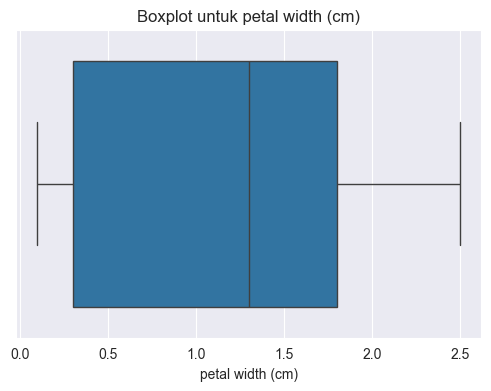

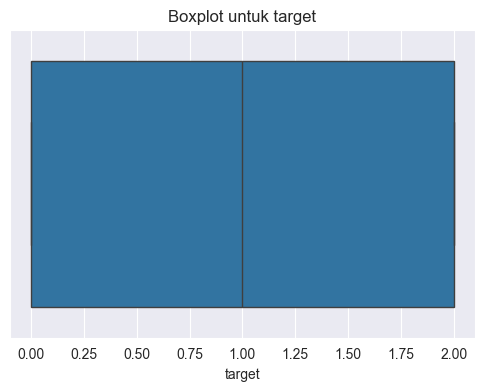

In [10]:
# 1. Mising Values
print("\nJumlah nilai yang hilang untuk setiap kolom:")
print(df.isnull().sum())  # Check for missing values in each column

# 2. Detect and handle duplicate data
duplicate_rows = df.duplicated().sum()
if duplicate_rows > 0:
    print(f"Terdapat {duplicate_rows}, baris duplikat. Menghapus duplikat...")
    df.drop_duplicates(inplace=True)  # Remove duplicate rows
else:
    print("Tidak ada baris duplikat.")  # No duplicate rows found

# Unique values in each column
print("\nJumlah nilai unik untuk setiap kolom:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()}")  # Display the number of unique values in each column

print(df['target'].unique())

# 3. Outliers
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot untuk {column}")
    plt.show()

#### Exploratory Data Analysis (EDA):
Understand the distribution of each **variable individually**.

In [11]:
print(df.describe())  # Display descriptive statistics for numerical data

print("Distribusi kelas target:", df['target'].value_counts()) # Display the distribution of target classes
print("Korelasi antar variabel:")
print(df.corr())  # Display the correlation matrix for numerical variables

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.300000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        149.000000  149.000000  
mean           1.194631    0.993289  
std            0.762622    0.817847  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Distribusi kelas target: target
0    50
1    50
2    49
Name: count, dty

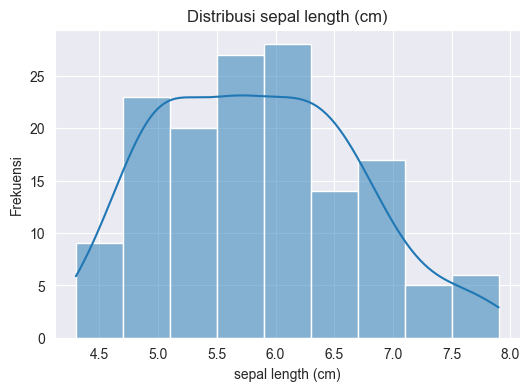

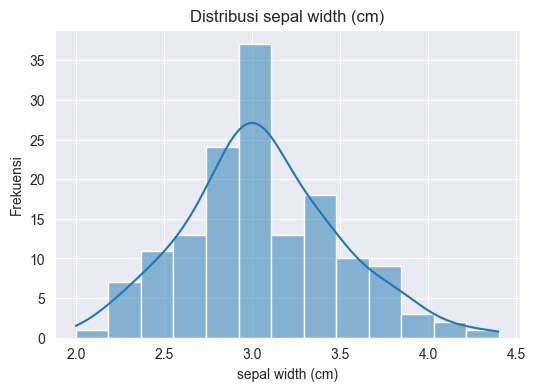

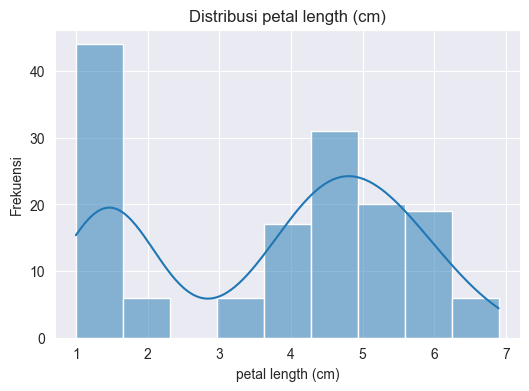

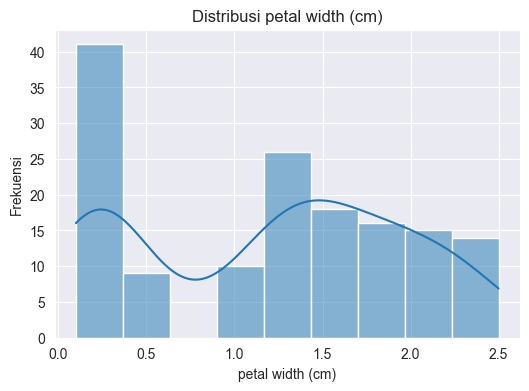

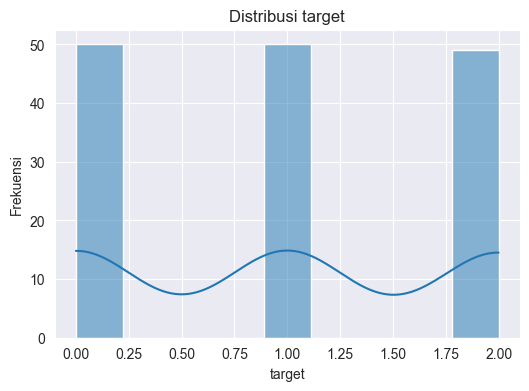

<Figure size 600x400 with 0 Axes>

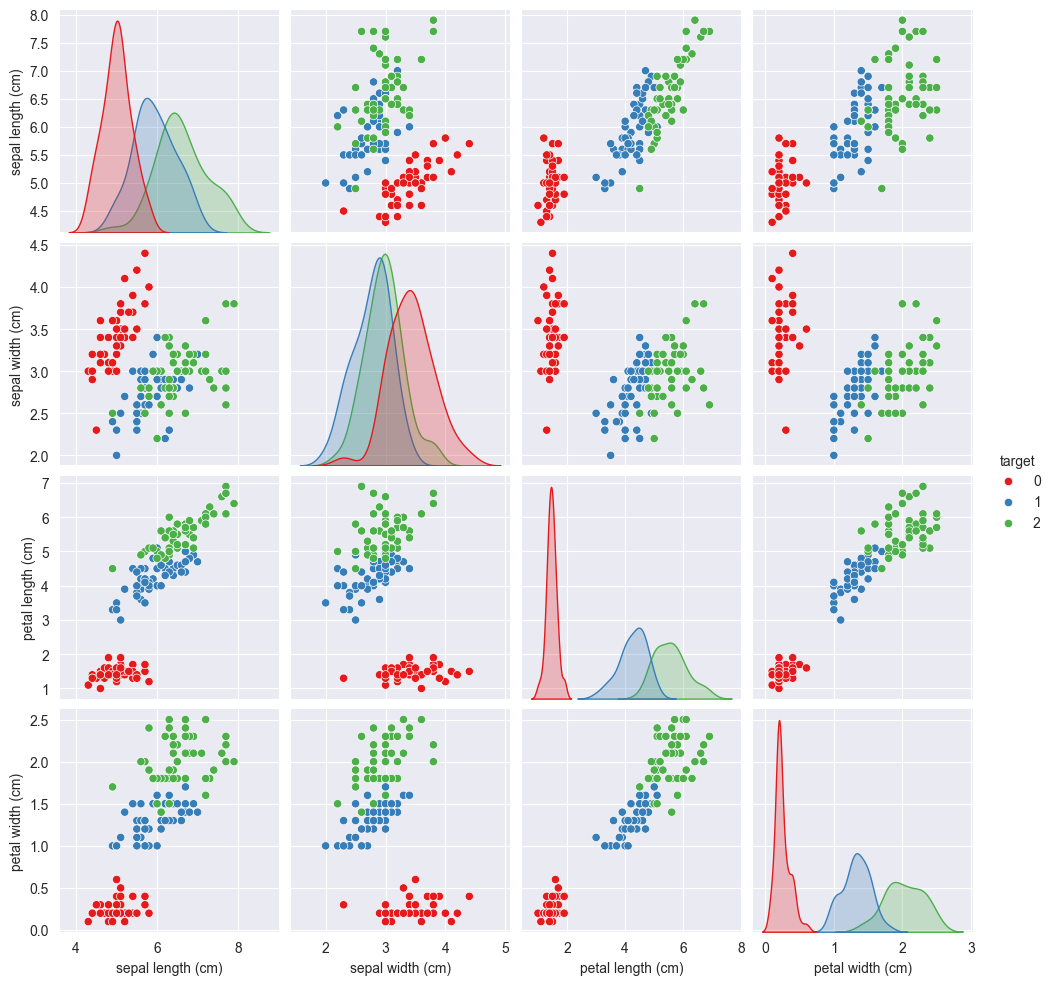

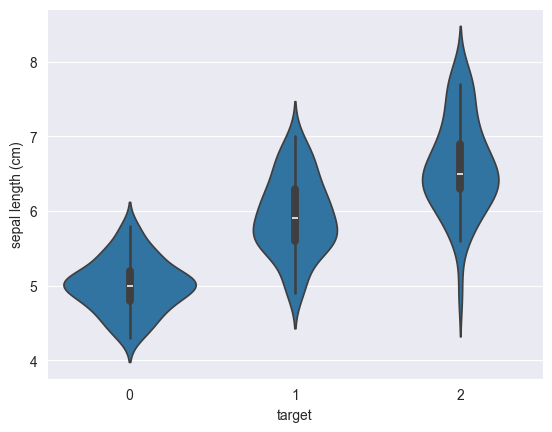

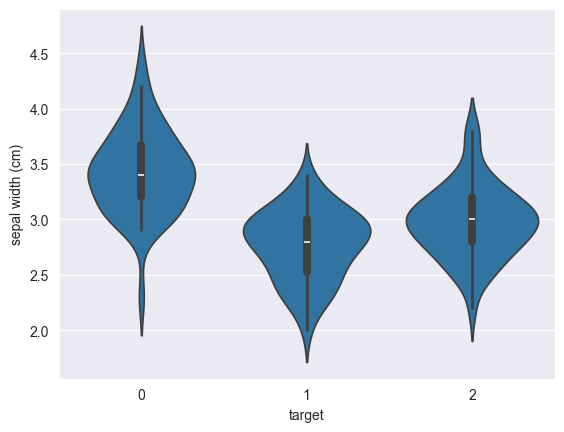

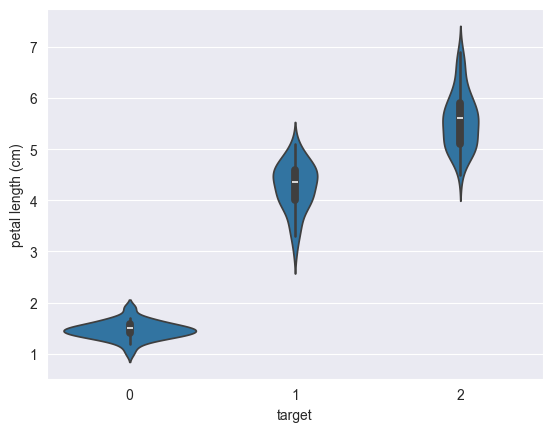

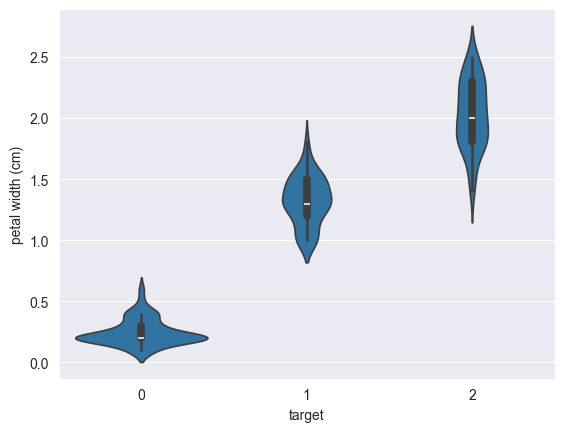

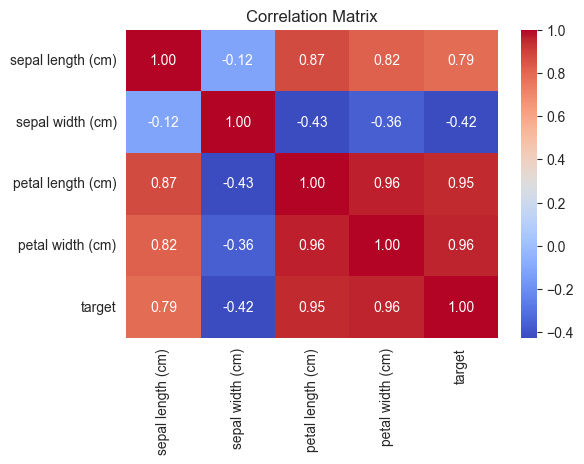

In [12]:
# Visualization of Numeric Data Distribution (Histogram & Boxplot)
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribusi {column}")
    plt.xlabel(column)
    plt.ylabel("Frekuensi")
    plt.show()

plt.figure(figsize=(6, 4))
sns.pairplot(df, hue='target', palette='Set1')
plt.show()

# Visualization of Categorical Data Distribution (Violin Plot)
for column in iris.feature_names:
    sns.violinplot(data=df, x='target', y=column)
    plt.show()

# Visualization correlation between numerical variables (Heatmap)
plt.figure(figsize=(6, 4))
plt.title("Correlation Matrix")
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

#### Data Preparation for Modeling

In [13]:
# Kriteria pemilihan data:
# - Membagi data menjadi data training dan data testing dengan rasio 80:20
# - Menggunakan metode stratified sampling untuk memastikan distribusi kelas target
#   pada data training dan testing sama

# Teknik pemilihan data:
# - Menggunakan fungsi train_test_split dari scikit-learn

# Membagi data menjadi data training dan data testing

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42) # Probability Sampling: Stratified sampling

# Menampilkan ukuran data training dan testing
print("Ukuran data training:", X_train.shape)
print("Ukuran data test:", X_test.shape)

# Menampilkan distribusi kelas target pada data training dan testing
print("Distribusi kelas target kelas pada training", y_train.value_counts())
print("Distribusi kelas target kelas pada testing", y_test.value_counts())

# Record (Rows) dari data training
record_train = X_train.shape[0]
print("Record (Rows) dari data training", record_train)

#Record (Rows) dari data testing
record_test = X_test.shape[0]
print("Record (Columns) dari data test", record_test)

Ukuran data training: (119, 4)
Ukuran data test: (30, 4)
Distribusi kelas target kelas pada training target
0    40
1    40
2    39
Name: count, dtype: int64
Distribusi kelas target kelas pada testing target
1    10
2    10
0    10
Name: count, dtype: int64
Record (Rows) dari data training 119
Record (Columns) dari data test 30


In [14]:
# Menggabungkan dataset dengan dirinya sendiri
merged_df = pd.concat([df, df], axis=0)

# Mengecek dataset yang diggunkan
print("Ukuran dataset yang digunakan:", merged_df.shape)

# Mengecek data yang duplikat
print("Jumlah data yang duplikat:",merged_df.duplicated().sum())

# Mengecek data yang hilang
print("Jumlah data yang hilang atau missing value:", df.isnull().sum())

print(merged_df)

# Pemeriksaan kualitas integrasi data:
# - Periksa konsistensi data antar kolom
# - Periksa apakah ada nilai yang tidak wajar atau outlier
# - Periksa apakah format data sudah sesuai dengan yang dibutuhkan oleh model

# Contoh:
# - Jika ada kolom tanggal, pastikan formatnya sama
# - Jika ada kolom numerik, pastikan tidak ada nilai yang tidak wajar
# - Jika ada kolom kategorikal, pastikan tidak ada nilai yang ambigu

# Formatting data agar sesuai dengan tujuan pemodelan:
# - Pastikan semua kolom memiliki tipe data yang sesuai
# - Pastikan nama kolom tidak mengandung spasi atau karakter khusus
# - Pastikan data sudah dinormalisasi atau distandarisasi jika dibutuhkan

# Contoh:
# - Konversi kolom tanggal ke format datetime
# - Mengganti spasi pada nama kolom dengan underscore
# - Melakukan normalisasi data menggunakan MinMaxScaler


# Contoh formatting data:
# merged_df.columns = [col.replace(' ', '_') for col in merged_df.columns]
# Misalnya, jika ingin menggunakan MinMaxScaler untuk normalisasi data
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# merged_df[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']] = scaler.fit_transform(merged_df[['sepal_length_(cm)', 'sepal_width_(cm)', 'petal_length_(cm)', 'petal_width_(cm)']])

# Menampilkan dataset yang sudah digabungkan dan diformat
print("\nDataset yang sudah digabungkan dan diformat:\n", merged_df)

Ukuran dataset yang digunakan: (298, 5)
Jumlah data yang duplikat: 149
Jumlah data yang hilang atau missing value: sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5      